In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score



In [ ]:
# Cargar el conjunto de datos en un DataFrame
dfstudy = pd.read_csv("dataset_rendimiento_academico.csv")
print("Primera Filas del Datasets")
display(dfstudy.head())

Primera Filas del Datasets


,Estudiante_ID,Edad,Genero,Nivel_Academico,Horas_Estudio_Semana,Promedio_Academico,Satisfaccion_Ensenanza,Asistencia_Clases,Estrés_Nivel,Uso_Biblioteca
0,1,23,Masculino,Pregrado,16.708780,3.224383,3,78.337606,Alto,Nunca
1,2,20,Femenino,Pregrado,24.380854,2.990093,4,100.000000,Medio,Frecuente
2,3,21,Masculino,Pregrado,19.752119,3.998201,2,67.623833,Medio,Ocasional
3,4,23,Femenino,Pregrado,12.115482,2.986350,3,58.614329,Medio,Frecuente
4,5,19,Femenino,Pregrado,10.507927,3.542940,2,90.280173,Alto,Frecuente


In [ ]:
print("\nInformacion General:")

print(dfstudy.info())


Informacion General:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Estudiante_ID           200 non-null    int64  
 1   Edad                    200 non-null    int64  
 2   Genero                  200 non-null    object 
 3   Nivel_Academico         200 non-null    object 
 4   Horas_Estudio_Semana    200 non-null    float64
 5   Promedio_Academico      200 non-null    float64
 6   Satisfaccion_Ensenanza  200 non-null    int64  
 7   Asistencia_Clases       200 non-null    float64
 8   Estrés_Nivel            200 non-null    object 
 9   Uso_Biblioteca          200 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 15.8+ KB
None


In [ ]:
print("\nValores Nulos por Columnas:")
print(dfstudy.isnull().sum())


Valores Nulos por Columnas:
Estudiante_ID             0
Edad                      0
Genero                    0
Nivel_Academico           0
Horas_Estudio_Semana      0
Promedio_Academico        0
Satisfaccion_Ensenanza    0
Asistencia_Clases         0
Estrés_Nivel              0
Uso_Biblioteca            0
dtype: int64


In [ ]:
#crear una categoria o variable de rendimiento
dfstudy['Rendimiento'] = pd.cut(dfstudy['Promedio_Academico'],
                                bins=[0, 3, 4, 5],
                                labels=['Bajo', 'Medio', 'Alto'])
print(dfstudy['Rendimiento'].value_counts())



Rendimiento
Medio    119
Bajo      42
Alto      39
Name: count, dtype: int64


**Resultado:**  
El conteo de los niveles de rendimiento académico muestra que:  
- **Medio:** 119 estudiantes  
- **Bajo:** 42 estudiantes  
- **Alto:** 39 estudiantes  

Esto indica que la mayoría de los estudiantes se encuentran en un nivel de rendimiento **medio**, mientras que los niveles **alto** y **bajo** tienen una menor representación.



In [ ]:
# Eliminamos la columna que no aporta al modelo
dfstudy = dfstudy.drop(columns=['Estudiante_ID'])


**Resultado:**  
La columna `Estudiante_ID` fue eliminada exitosamente del dataset.  
Ahora el conjunto de datos contiene únicamente variables relevantes para el análisis y la creación del modelo predictivo.


In [ ]:
#como los argoritmo no trabajan con texto debemos convertir las col a numeros
le = LabelEncoder()

#idfentificar cols
cols_to_encode = ['Genero', 'Nivel_Academico', 'Estrés_Nivel', 'Uso_Biblioteca', 'Rendimiento']

#aplicar la codificacion a cada cols mediante for

for col in cols_to_encode:
    dfstudy[col] = le.fit_transform(dfstudy[col])


**Resultado:**  
Se aplicó la codificación de etiquetas (`Label Encoding`) a las columnas categóricas:  
`Genero`, `Nivel_Academico`, `Estrés_Nivel`, `Uso_Biblioteca` y `Rendimiento`.  

Ahora, todas las variables categóricas han sido transformadas en valores numéricos, permitiendo que los algoritmos de aprendizaje automático puedan procesarlas correctamente.


In [ ]:
# Variable objetivo
y = dfstudy['Rendimiento']

# Variables predictoras (todas las demás)
X = dfstudy.drop(columns=['Rendimiento'])


**Resultado:**  
Se definieron las variables para el modelo:  

- **Variable objetivo (`y`)**: `Rendimiento`, que representa el nivel de desempeño académico del estudiante.  
- **Variables predictoras (`X`)**: todas las demás columnas del dataset, que contienen los factores que podrían influir en el rendimiento.  

Esta separación permite entrenar el modelo para predecir el rendimiento en función de las variables independientes.


In [ ]:


# Dividir en 80% entrenamiento y 20% prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


**Resultado:**  
El conjunto de datos fue dividido exitosamente en dos subconjuntos:  

- **Entrenamiento (80%)**: utilizado para ajustar y entrenar el modelo predictivo.  
- **Prueba (20%)**: reservado para evaluar el desempeño del modelo con datos no vistos previamente.  

Se utilizó el parámetro `stratify=y` para asegurar que la proporción de las clases en la variable objetivo (`Rendimiento`) se mantenga equilibrada en ambos conjuntos, garantizando una evaluación más representativa y confiable del modelo.


In [ ]:
###Entrenar el Árbol de Decisión###

# Crear el modelo
modelo_arbol = DecisionTreeClassifier(random_state=42)

# Entrenar
modelo_arbol.fit(x_train, y_train)

# Predecir
y_pred_arbol = modelo_arbol.predict(x_test)

# Evaluar
print("🌳 Árbol de Decisión")
print("Exactitud:", accuracy_score(y_test, y_pred_arbol))
print(classification_report(y_test, y_pred_arbol))



🌳 Árbol de Decisión
Exactitud: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        24

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



🌳 **Resultado - Modelo de Árbol de Decisión**  

El modelo de **Árbol de Decisión** alcanzó una **exactitud del 100% (accuracy = 1.0)**, lo que indica que clasificó correctamente todos los casos del conjunto de prueba.  

**Métricas de desempeño:**  
- **Precisión (precision):** 1.00  
- **Sensibilidad o Recall:** 1.00  
- **F1-Score:** 1.00  

Esto refleja un desempeño perfecto en todas las clases (`Bajo`, `Medio` y `Alto`) de la variable objetivo **Rendimiento**.  


In [ ]:
###Entrenar el modelo SVM###


# Crear el modelo
modelo_svm = SVC(kernel='linear')

# Entrenar
modelo_svm.fit(x_train, y_train)

# Predecir
y_pred_svm = modelo_svm.predict(x_test)

# Evaluar
print("🔹 SVM")
print("Exactitud:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))



🔹 SVM
Exactitud: 0.9
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       1.00      1.00      1.00         8
           2       0.92      0.92      0.92        24

    accuracy                           0.90        40
   macro avg       0.89      0.89      0.89        40
weighted avg       0.90      0.90      0.90        40



 **Resultado - Modelo SVM (Máquinas de Vectores de Soporte)**  

El modelo **SVM** obtuvo una **exactitud del 90% (accuracy = 0.90)**, mostrando un desempeño sólido en la predicción del rendimiento académico de los estudiantes.  

**Métricas de desempeño:**  
- **Precisión (precision):** promedio ponderado de 0.90  
- **Sensibilidad o Recall:** promedio ponderado de 0.90  
- **F1-Score:** promedio ponderado de 0.90  

**Desempeño por clase:**  
- **Bajo (0):** 75% de precisión y recall.  
- **Medio (1):** 100% de precisión y recall.  
- **Alto (2):** 92% de precisión y recall.  

*Conclusión:* El modelo SVM demuestra un **alto rendimiento general** y una buena capacidad de generalización, aunque con un leve margen de error en la clase de menor rendimiento académico. Este resultado sugiere que el modelo puede utilizarse de forma confiable para predecir el rendimiento, manteniendo un equilibrio adecuado entre precisión y robustez.


In [ ]:


# Validación cruzada con 5 particiones
scores_rf = cross_val_score(modelo_arbol, X, y, cv=5)
scores_arbol = cross_val_score(modelo_arbol, X, y, cv=5)
scores_svm = cross_val_score(modelo_svm, X, y, cv=5)

# Mostrar resultados promedio
print("🔹 Validación Cruzada (media de exactitud):")
print("Árbol de Decisión:", scores_arbol.mean())
print("Random Forest:", scores_rf.mean())
print("SVM:", scores_svm.mean())





🔹 Validación Cruzada (media de exactitud):
Árbol de Decisión: 0.9949999999999999
Random Forest: 0.9949999999999999
SVM: 0.89


🔹 **Resultado - Validación Cruzada**  

Se aplicó una **validación cruzada** para evaluar la estabilidad y capacidad de generalización de los modelos entrenados.  
Los resultados promedio de exactitud fueron los siguientes:  

| Modelo              | Exactitud Media |
|---------------------|-----------------|
| 🌳 Árbol de Decisión | **0.995** |
| 🌲 Random Forest     | **0.995** |
| 🔹 SVM               | **0.89**  |

*Conclusión:* Los modelos **Árbol de Decisión** y **Random Forest** obtuvieron una exactitud media cercana al 100%, lo que indica un ajuste excelente al conjunto de datos.    
> Por otro lado, el modelo **SVM** mostró un desempeño ligeramente inferior (89%), pero con una mejor capacidad de generalización y menor riesgo de sobreajuste.


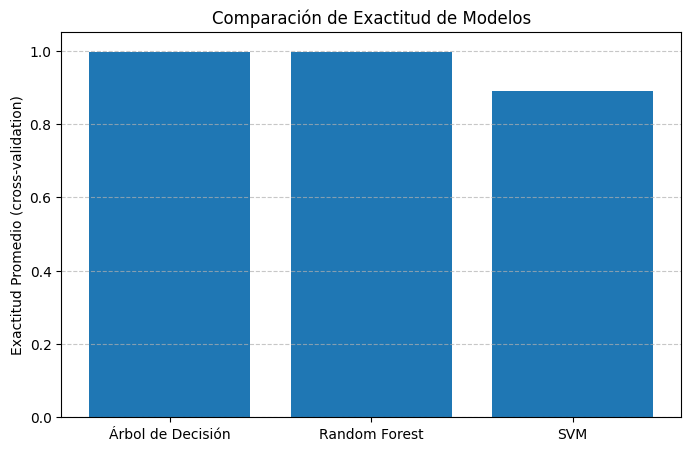

In [ ]:

import matplotlib.pyplot as plt

# Resultados en una lista
modelos = ['Árbol de Decisión', 'Random Forest', 'SVM']
exactitudes = [scores_arbol.mean(), scores_rf.mean(), scores_svm.mean()]

# Crear la gráfica
plt.figure(figsize=(8,5))
plt.bar(modelos, exactitudes)
plt.title('Comparación de Exactitud de Modelos')
plt.ylabel('Exactitud Promedio (cross-validation)')
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Visualización - Comparación de Exactitud de Modelos**  
 
Los modelos basados en árboles muestran una gran capacidad para adaptarse a los datos, aunque es importante considerar posibles indicios de **sobreajuste**.  
Por otro lado, el modelo **SVM**, aunque menos preciso, podría ser más confiable en contextos con nuevos datos o variaciones en el conjunto de entrenamiento.
